In [39]:
# autoreload magic
%load_ext autoreload
%autoreload 2

In [41]:
import numpy as np
import entropy

def phi_N(lam, N):

    """
    Args:
        N: size of alphabet

    """
    y = np.zeros_like(lam)
    for k in range(1, N+1):

        a_k = k*(1+k)*np.log2((k+1)/k)
        slc = np.where(((k-1)/k <= lam) & (lam  <= k/(k+1)))
        y[slc] += a_k*(lam[slc] - (k-1)/k) + np.log2(k)
    return y

def edges_of_phi(N):
    xvals = []
    yvals = []
    for k in range(1, N+1):
        x = k / (k+1)
        a_k = k*(1+k)*np.log2((k+1)/k)
        xvals.append(x)
        yvals.append(a_k*(x - (k-1)/k) + np.log2(k))
    return xvals, yvals

def fano_ineq(lam, N):
    return entropy.binary_entropy(lam) + lam*np.log2(N-1)


C:\Users\peter\AppData\Local\Temp\ipykernel_16984\1663694498.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xx, yy, 'ro', label='edges of phi_N', color='r', marker='.', markersize=10)
C:\Users\peter\AppData\Local\Temp\ipykernel_16984\1663694498.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xx, yy, 'ro', label='edges of phi_N', color='r', marker='.', markersize=10)


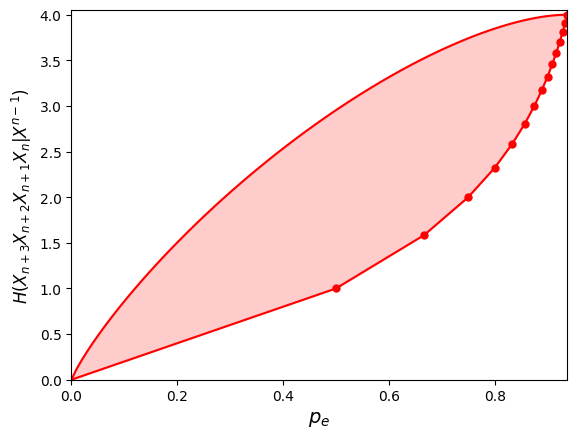

In [56]:
import matplotlib.pyplot as plt

p_err = np.linspace(0, 1, 100)
N = 16
y1 = phi_N(p_err, N)
y2 = fano_ineq(p_err, N)
plt.plot(p_err, y1, label='phi_N', color='r')
plt.plot(p_err, y2, label='fano_ineq',  color='r')

# edges of phi_N
xx, yy = edges_of_phi(N)
plt.plot(xx, yy, 'ro', label='edges of phi_N', color='r', marker='.', markersize=10)
# fill between y1 and y2
plt.fill_between(p_err, y1, y2, alpha=0.2, color='r')
plt.xlabel(r'$p_{e}$', size=14)
plt.ylabel(r'$H(X_{n+3}X_{n+2}X_{n+1} X_n|X^{n-1})$', size=12)
# plt.axvline(0.5, c='k', ls='--')
# plt.axvline(1 - 1/N, c='k', ls='--')
plt.xlim(0, 1 - 1/N)
plt.ylim(0, 4.05)

plt.savefig('../figures/feder_example.pdf', bbox_inches='tight')


In [ ]:
plt.legend()